#Tugas Praktikum

##Tugas K-Means

In [ ]:
#Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('/content/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


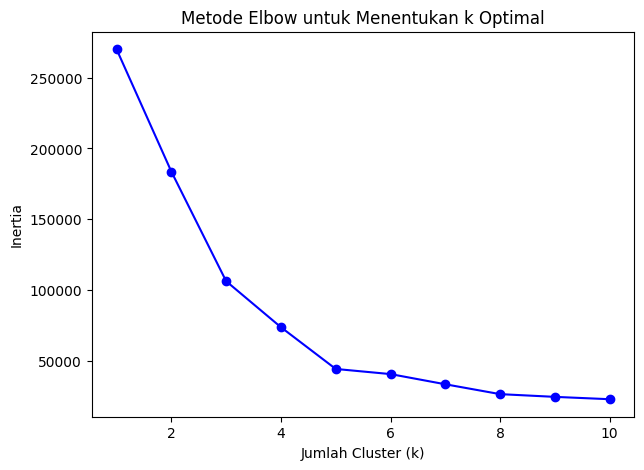

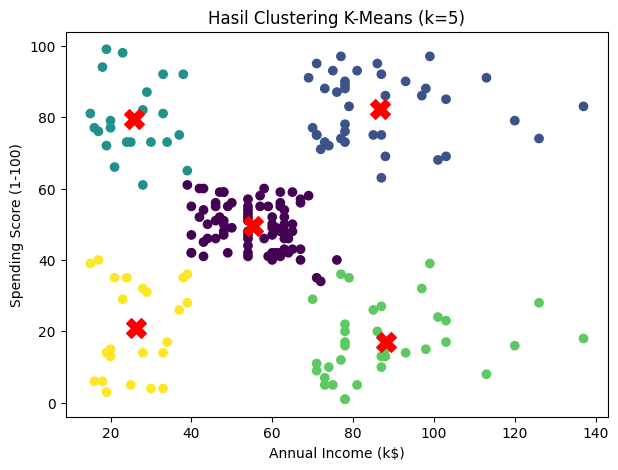

   CustomerID  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1                  15                      39        4
1           2                  15                      81        2
2           3                  16                       6        4
3           4                  16                      77        2
4           5                  17                      40        4


In [ ]:
# 2. Pilih fitur yang relevan
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 3. Cari jumlah cluster optimal dengan metode Elbow
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# 4. Plot Elbow Method
plt.figure(figsize=(7,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan k Optimal')
plt.show()

# 5. Setelah melihat grafik elbow, misal k optimal = 5
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# 6. Visualisasi hasil clustering
plt.figure(figsize=(7,5))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='red', marker='X')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title(f'Hasil Clustering K-Means (k={k_optimal})')
plt.show()

# 7. Lihat beberapa hasil cluster
print(df[['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())


##Tugas DBSCAN


Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.

In [ ]:
X, y_true = make_moons(n_samples=1000, noise=0.05, random_state=42)

X = StandardScaler().fit_transform(X)

Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.

In [ ]:
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 0



Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.

In [ ]:
from sklearn.metrics import (
    homogeneity_score, completeness_score, v_measure_score,
    adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
)

print(f"Homogeneity: {homogeneity_score(y_true, labels):.3f}")
print(f"Completeness: {completeness_score(y_true, labels):.3f}")
print(f"V-measure: {v_measure_score(y_true, labels):.3f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(y_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {adjusted_mutual_info_score(y_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {silhouette_score(X, labels):.3f}")

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.391


Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).

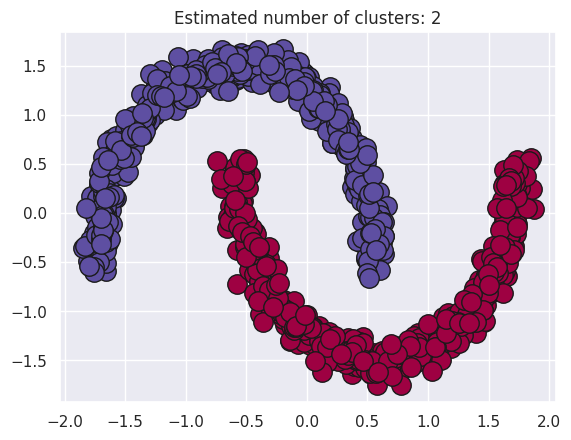

In [ ]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()


Lakukan eksperimen:

- eps = 0.05, 0.1, 0.3, 0.5

- min_samples = 3, 10, 20

- Catat perubahan klaster, noise, dan kualitas evaluasi

In [ ]:
def evaluate_dbscan(X, y_true, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = db.labels_

    # Jumlah klaster (tidak termasuk noise -1)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    # Evaluasi
    if n_clusters > 1:
        silhouette = silhouette_score(X, labels)
    else:
        silhouette = np.nan

    metrics = {
        "eps": eps,
        "min_samples": min_samples,
        "clusters": n_clusters,
        "noise": n_noise,
        "Homogeneity": homogeneity_score(y_true, labels),
        "Completeness": completeness_score(y_true, labels),
        "V-measure": v_measure_score(y_true, labels),
        "ARI": adjusted_rand_score(y_true, labels),
        "AMI": adjusted_mutual_info_score(y_true, labels),
        "Silhouette": silhouette
    }

    return metrics

# Eksperimen
eps_values = [0.05, 0.1, 0.3, 0.5]
min_samples_values = [3, 10, 20]

results = []

for eps in eps_values:
    for ms in min_samples_values:
        metrics = evaluate_dbscan(X, y_true, eps, ms)
        results.append(metrics)

df_results = pd.DataFrame(results)

In [ ]:
display(df_results)

,eps,min_samples,clusters,noise,Homogeneity,Completeness,V-measure,ARI,AMI,Silhouette
0,0.05,3,69,186,0.815554,0.152548,0.257021,0.030044,0.243805,0.112929
1,0.05,10,3,970,0.030669,0.126764,0.049389,0.002283,0.045864,-0.294190
2,0.05,20,0,1000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN
3,0.10,3,2,14,0.986207,0.902896,0.942714,0.972179,0.942634,0.251690
4,0.10,10,7,57,0.943317,0.409546,0.571132,0.523399,0.569801,0.162306
5,0.10,20,6,850,0.153928,0.155466,0.154693,0.016754,0.150916,-0.360195
6,0.30,3,2,0,1.000000,1.000000,1.000000,1.000000,1.000000,0.391160
7,0.30,10,2,0,1.000000,1.000000,1.000000,1.000000,1.000000,0.391160
8,0.30,20,2,0,1.000000,1.000000,1.000000,1.000000,1.000000,0.391160
9,0.50,3,2,0,1.000000,1.000000,1.000000,1.000000,1.000000,0.391160
